<a href="https://colab.research.google.com/github/laggywiggl/LGHERBAL/blob/master/PCA%20with%20ML%20algos%20on%202%20datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###acp test with POWER ITERATION

Eigenvalues:
19.3
2.6999999999999993
Variance Explained by Each Eigenvector:
Eigenvector 1: 87.73%
Eigenvector 2: 12.27%
Eigenvectors:
[0.70710678 0.70710678]
[-0.70710678  0.70710678]


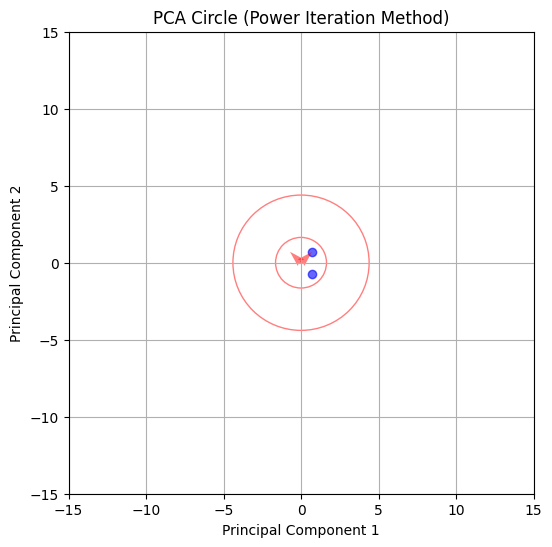

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca(matrix):
    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    cov = np.cov(np.array(centered_matrix), rowvar=False)

    eigenvalues, eigenvectors = power_iteration(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    for value in eigenvalues:
        print(value)

    total_variance = np.sum(eigenvalues)

    print("Variance Explained by Each Eigenvector:")
    for i, value in enumerate(eigenvalues):
        explained_variance = (value / total_variance) * 100
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    print("Eigenvectors:")
    for row in eigenvectors.T:
        print(row)

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return cov, eigenvalues, eigenvectors

def power_iteration(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            x = np.dot(matrix, x)
            eigenvalue = np.linalg.norm(x)
            x /= eigenvalue

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

matrix = [[6, 2],
          [1, 6],
          [4, 5],
          [5, 3],
          [3, 4],
          [2, 1],
          [9, 8],
          [7, 9],
          [8, 7],
          [10, 10],
          [11, 11]]

cov_matrix, eigenvalues, eigenvectors = pca(matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Circle (Power Iteration Method)')
plt.grid()
plt.show()

###acp test with QR **method**

Eigenvalues:
19.300000000000004
2.7
Variance Explained by Each Eigenvector:
Eigenvector 1: 87.73%
Eigenvector 2: 12.27%
Eigenvectors:
[0.70710678 0.70710678]
[-0.70710678  0.70710678]


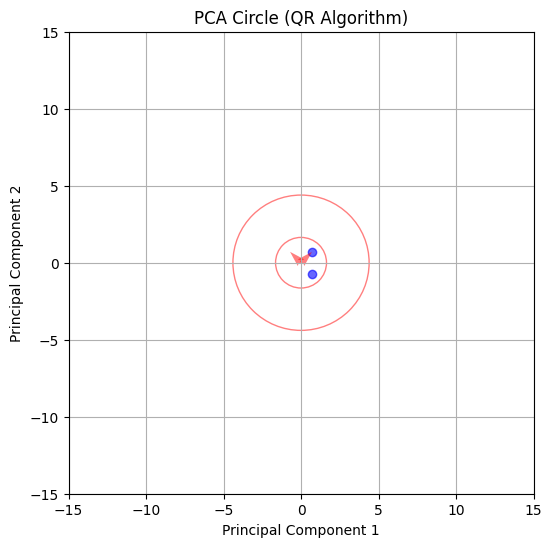

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca(matrix):
    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    cov = np.cov(np.array(centered_matrix), rowvar=False)

    eigenvalues, eigenvectors = qr_algorithm(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    for value in eigenvalues:
        print(value)

    total_variance = np.sum(eigenvalues)

    print("Variance Explained by Each Eigenvector:")
    for i, value in enumerate(eigenvalues):
        explained_variance = (value / total_variance) * 100
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    print("Eigenvectors:")
    for row in eigenvectors.T:
        print(row)

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return cov, eigenvalues, eigenvectors

def qr_algorithm(matrix, num_iterations=100):
    n = matrix.shape[0]
    A = matrix
    eigenvectors = np.identity(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        eigenvectors = np.dot(eigenvectors, Q)
    eigenvalues = np.diagonal(A)
    return eigenvalues, eigenvectors

matrix = [[6, 2],
          [1, 6],
          [4, 5],
          [5, 3],
          [3, 4],
          [2, 1],
          [9, 8],
          [7, 9],
          [8, 7],
          [10, 10],
          [11, 11]]

cov_matrix, eigenvalues, eigenvectors = pca(matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Circle (QR Algorithm)')
plt.grid()
plt.show()

### ACP TEST WITH JACOBI

Eigenvalues:
19.299999999999997
2.6999999999999975
Variance Explained by Each Eigenvector:
Eigenvector 1: 87.73%
Eigenvector 2: 12.27%
Eigenvectors:
[0.70710678 0.70710678]
[-0.70710678  0.70710678]


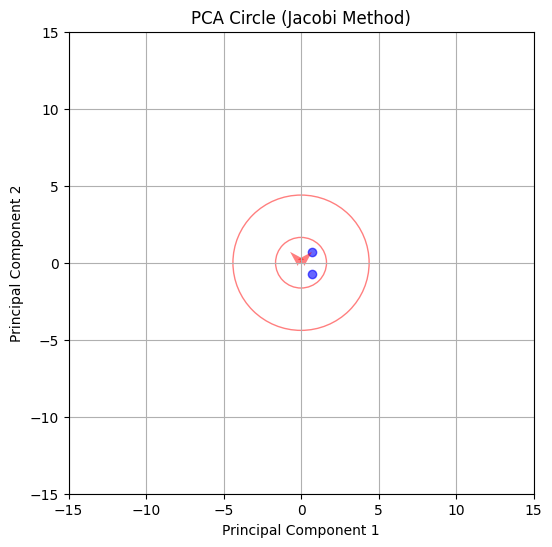

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca(matrix):
    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    cov = np.cov(np.array(centered_matrix), rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    for value in eigenvalues:
        print(value)

    total_variance = np.sum(eigenvalues)

    print("Variance Explained by Each Eigenvector:")
    for i, value in enumerate(eigenvalues):
        explained_variance = (value / total_variance) * 100
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    print("Eigenvectors:")
    for row in eigenvectors.T:
        print(row)

    return cov, eigenvalues, eigenvectors

# Define Jacobi method for eigenvalue computation
def jacobi_eigenvalue(cov_matrix, tolerance=1e-6):
    n = cov_matrix.shape[0]
    eigenvalues = np.copy(np.diag(cov_matrix))

    max_iterations = 1000
    iteration = 0

    while iteration < max_iterations:
        max_off_diagonal = 0
        p, q = 0, 0

        # Find the maximum off-diagonal element
        for i in range(n - 1):
            for j in range(i + 1, n):
                if abs(cov_matrix[i, j]) > max_off_diagonal:
                    max_off_diagonal = abs(cov_matrix[i, j])
                    p, q = i, j

        if max_off_diagonal < tolerance:
            break

        # Compute Jacobi rotation angle (theta)
        a_ip = cov_matrix[p, p]
        a_iq = cov_matrix[p, q]
        a_qq = cov_matrix[q, q]
        if np.isclose(a_ip, a_qq):
            theta = np.pi / 4.0  # Set theta to 45 degrees if a_ip and a_qq are close
        else:
            theta = 0.5 * np.arctan(2 * a_iq / (a_ip - a_qq))

        # Compute Jacobi rotation matrix
        J = np.eye(n)
        J[p, p] = np.cos(theta)
        J[q, q] = np.cos(theta)
        J[p, q] = -np.sin(theta)
        J[q, p] = np.sin(theta)

        # Update the covariance matrix
        cov_matrix = np.dot(np.dot(J.T, cov_matrix), J)

        eigenvalues = np.copy(np.diag(cov_matrix))

        iteration += 1

    return eigenvalues

matrix = [[6, 2],
          [1, 6],
          [4, 5],
          [5, 3],
          [3, 4],
          [2, 1],
          [9, 8],
          [7, 9],
          [8, 7],
          [10, 10],
          [11, 11]]

cov_matrix, eigenvalues, eigenvectors = pca(matrix)

# Calculate eigenvalues using Jacobi method
eigenvalues_jacobi = jacobi_eigenvalue(cov_matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues_jacobi)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()

#Heast disease

###google drive

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Trying fuzzy on labeled data of intoxication

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('/content/drive/My Drive/datasetMathAI/labeled.csv')




In [ ]:
df


,Moyen de déclaration,Jours du mois,Jour de Semaine,Mois,Année,Saison,Ville,Région,Institution,Service,...,Trait_Conseille par CAPM_1,Trait_Conseille par CAPM_2,Trait_Conseille par CAPM_3,Trait_Conseille par CAPM_4,Relance,Grade,Hospitalisation,Duree_Sejour,Evolution,Evol2
0,0,15,Samedi,11,1980,0,Kenitra,Gharb-Chrarda-Beni Hssen,0,0,...,12,9,5,3,0,0,0,0,0,0
1,0,1,Vendredi,5,1981,1,Beni Mellal,Tadla-Azilal,0,0,...,12,9,5,3,1,0,0,1,0,0
2,0,21,Jeudi,5,1981,1,Casablanca Anfa,Grand Casablanca,0,0,...,12,9,5,3,1,0,1,2,0,0
3,0,28,Vendredi,8,1981,2,Casablanca Anfa,Grand Casablanca,0,0,...,12,9,5,3,1,0,1,1,0,0
4,0,8,Jeudi,10,1981,0,Casablanca Anfa,Grand Casablanca,0,0,...,12,9,5,3,1,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2,11,Dimanche,5,2014,1,Tanger - Assilah,Tanger-Tetouan,17,2,...,0,0,0,0,5,3,1,1,0,0
607,1,30,Jeudi,1,2014,3,Casablanca Anfa,Grand Casablanca,0,3,...,16,0,0,0,2,5,0,1,0,0
608,1,27,Mardi,5,2014,1,Rabat,Rabat-Sale-Zemmour-Zaer,11,5,...,8,0,0,0,2,1,2,3,1,0
609,1,8,Mardi,7,2014,2,Rabat,Rabat-Sale-Zemmour-Zaer,0,1,...,13,11,4,0,2,2,1,3,0,0


###  data intoxic on pca

<ipython-input-39-fbbeed65727e>:57: RuntimeWarning: invalid value encountered in double_scalars
  reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]


Eigenvalues:
[1.89313395 1.13042034 1.10570631 1.08785655 1.00163934 1.00163934
 1.00163934 1.00163934 1.00163934 1.00163934 1.00163934 1.00163934
 1.00163934 1.00163934 1.00163934 1.00163934 0.91664493 0.91246934
 0.77893684 0.64535815 0.54422768 0.         0.        ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 9.00%
Eigenvector 2: 5.37%
Eigenvector 3: 5.26%
Eigenvector 4: 5.17%
Eigenvector 5: 4.76%
Eigenvector 6: 4.76%
Eigenvector 7: 4.76%
Eigenvector 8: 4.76%
Eigenvector 9: 4.76%
Eigenvector 10: 4.76%
Eigenvector 11: 4.76%
Eigenvector 12: 4.76%
Eigenvector 13: 4.76%
Eigenvector 14: 4.76%
Eigenvector 15: 4.76%
Eigenvector 16: 4.76%
Eigenvector 17: 4.36%
Eigenvector 18: 4.34%
Eigenvector 19: 3.70%
Eigenvector 20: 3.07%
Eigenvector 21: 2.59%
Eigenvector 22: 0.00%
Eigenvector 23: 0.00%


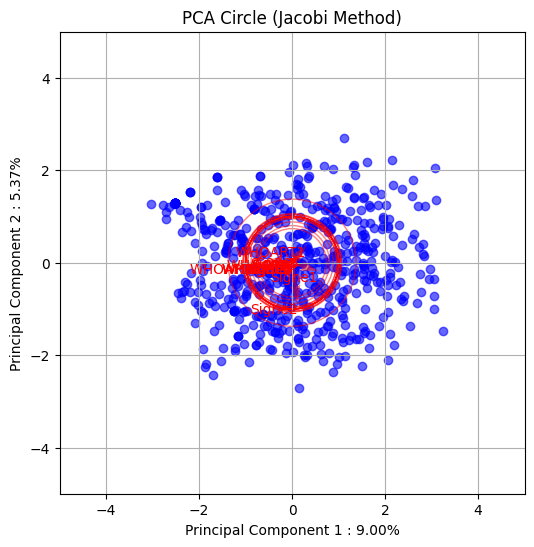

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def jacobi_eigenvalue(A, tol=1e-10, max_iter=100):
    n = len(A)
    V = np.identity(n)  # Initial transformation matrix (identity matrix)
    num_iter = 0

    while num_iter < max_iter:
        off_diag = np.abs(A - np.diag(np.diag(A))).max()

        if off_diag < tol:
            break

        max_indices = np.unravel_index(
            np.argmax(np.abs(A - np.diag(np.diag(A))), axis=None), A.shape)
        i, j = max_indices
        theta = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])

        R = np.identity(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)

        A = np.dot(np.dot(R.T, A), R)
        V = np.dot(V, R)
        num_iter += 1

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = jacobi_eigenvalue(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances

# Load your data into a Pandas DataFrame (replace 'your_data.csv' with your actual data file)

# Select the numerical features for PCA
"""selected_features = ["Prise_en_charge", "Abstention therapeutique", "Traitement symptomatique", "Traitement symptomatique.1", "Vomissement provoques",
                     "Lavage gastrique",
                      "Trait_Conseille par CAPM_1",
                     "Trait_Conseille par CAPM_2", "Trait_Conseille par CAPM_3", "Trait_Conseille par CAPM_4", "Grade", "Hospitalisation", "Duree_Sejour"]"""

selected_features = ["Moyen de déclaration",
                      "Age (Ans)",
                     "Age_INTOX", "Sexe", "Milieu ", "Type d'Intoxication", "Nombre de Produits",
                     "Produit 1", "Type de Produit1", "Composition_1", "Voie 1", "Produit 2", "Type produit_2",
                     "Composition_2", "Voie 2", "Circonstance_2", "Exposition", "Lieu_Intoxication", "Nb Symptome",
                     "Clinique", "Signe1", "Code1", "WHOART1", "Signe2", "Code2", "WHOART2", "Signe3", "Code3", "WHOART3",
                     "Signe4", "Code4", "WHOART4", "Signe5", "Code5", "WHOART5", "Signe6", "Code6", "WHOART6", "Signe7", "Code7",
                     "WHOART7", "Signe8", "Code8",
                     "Prise_en_charge", "Abstention therapeutique", "Traitement symptomatique", "Traitement symptomatique.1",
                     "Vomissement provoques", "Lavage gastrique", "Trait_Conseille par CAPM_1", "Trait_Conseille par CAPM_2",
                     "Trait_Conseille par CAPM_3", "Trait_Conseille par CAPM_4", "Relance", "Grade", "Hospitalisation", "Duree_Sejour", "Evolution", "Evol2"]

"""selected_features = ["Signe1", "Code1", "WHOART1", "Signe2", "Code2", "WHOART2", "Signe3", "Code3", "WHOART3",
                     "Signe4", "Code4", "WHOART4", "Signe5", "Code5", "WHOART5", "Signe6", "Code6", "WHOART6", "Signe7", "Code7",
                     "WHOART7", "Signe8", "Code8"]"""

selected_features = ["Moyen de déclaration", "Jours du mois", "Jour de Semaine", "Mois", "Année", "Saison",
                     "Ville", "Région", "Institution", "Service", "Age (Ans)", "Age_INTOX", "Sexe", "Poids",
                     "Milieu", "Type d'Intoxication", "Nombre de Produits", "Produit 1", "Type de Produit1",
                     "Composition_1", "Voie 1", "Produit 2", "Type produit_2", "Composition_2", "Voie 2", "Circonstance_2",
                     "Exposition", "Lieu_Intoxication", "Nb Symptome", "Clinique", "Signe1", "Code1", "WHOART1", "Signe2",
                     "Code2", "WHOART2", "Signe3", "Code3", "WHOART3", "Signe4", "Code4", "WHOART4", "Signe5", "Code5", "WHOART5",
                     "Signe6", "Code6", "WHOART6", "Signe7", "Code7", "WHOART7", "Signe8", "Code8", "WHOART8", "Signe9", "Code9",
                     "WHOART9", "Signe10", "code 10", "WHOAT 10", "Evaluation_Risque", "Relation", "Lieu du Traitement", "Prise_en_charge",
                     "Abstention therapeutique", "Traitement symptomatique", "Traitement symptomatique.1", "Vomissement provoques", "Lavage gastrique",
                     "Aspiration gastrique", "Traitement épurateur", "Epuration pulmonaire", "Epuration renale", "Epuration extrarenale", "Traitement antidotique",
                     "Autres1", "Autres2", "Trait_Avant_Appel_1", "Trait_Avant_Appel_2", "Trait_Avant_Appel_3", "Trait_Conseille par CAPM_1",
                     "Trait_Conseille par CAPM_2", "Trait_Conseille par CAPM_3", "Trait_Conseille par CAPM_4", "Relance", "Grade", "Hospitalisation", "Duree_Sejour", "Evolution", "Evol2"]

matrix = df[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle with features
for i, (magnitude, vector) in enumerate(zip(eigenvalue_magnitudes, eigenvectors.T)):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)
    plt.text(vector[0], vector[1], selected_features[i] , color='r', ha='right',va='top')

# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()


### use svm

In [2]:

import numpy as np
import pandas as pd
import tensorflow as tf

df = pd.read_csv('/content/drive/My Drive/datasetMathAI/labeled.csv')




In [3]:
selected_features = ["Moyen de déclaration", "Mois",  "Saison",
                     "Institution", "Service", "Age (Ans)", "Age_INTOX", "Sexe",
                     "Milieu ", "Type d'Intoxication", "Nombre de Produits", "Produit 1", "Type de Produit1",
                     "Composition_1", "Voie 1", "Produit 2", "Type produit_2", "Composition_2", "Voie 2", "Circonstance_2",
                     "Exposition", "Lieu_Intoxication", "Nb Symptome", "Clinique", "Signe1", "Code1", "WHOART1", "Signe2",
                     "Code2", "WHOART2", "Signe3", "Code3", "WHOART3", "Signe4", "Code4", "WHOART4", "Signe5", "Code5", "WHOART5",
                     "Signe6", "Code6", "WHOART6", "Signe7", "Code7", "WHOART7", "Signe8", "Code8", "WHOART8", "Signe9", "Code9",
                     "WHOART9", "Signe10", "code 10", "WHOAT 10 ", "Evaluation_Risque", "Relation", "Lieu du Traitement", "Prise_en_charge",
                     "Abstention therapeutique", "Traitement symptomatique", "Traitement symptomatique.1", "Vomissement provoques", "Lavage gastrique",
                     "Aspiration gastrique", "Traitement épurateur", "Epuration pulmonaire", "Epuration renale", "Epuration extrarenale", "Traitement antidotique",
                     "Autres1", "Autres2", "Trait_Avant_Appel_1", "Trait_Avant_Appel_2", "Trait_Avant_Appel_3", "Trait_Conseille par CAPM_1",
                     "Trait_Conseille par CAPM_2", "Trait_Conseille par CAPM_3", "Trait_Conseille par CAPM_4", "Relance", "Grade", "Hospitalisation", "Duree_Sejour"]
cat_var=[
   "Jours du mois", "Jour de Semaine","Année", "Ville", "Région",
]

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sélectionnez toutes les caractéristiques
X = df.drop('Evol2', axis=1)
y = df['Evol2']

# Prétraitement : One-Hot Encoding pour les caractéristiques catégorielles et normalisation pour les caractéristiques numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_features),
        ('cat', OneHotEncoder(), cat_var)])

X = preprocessor.fit_transform(X)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraînement du modèle SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.model_selection import train_test_split ,GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
              'kernel': ['linear', 'rbf']}  # Kernel type


# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the testing set
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
predictions = best_svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix ,classification_report

# Prédiction
predictions = clf.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, predictions)
print(f'Précision: {accuracy*100:.2f}%')

# Calcul du rappel
recall = recall_score(y_test, predictions)
print(f'Rappel: {recall*100:.2f}%')

# Calcul du score F1
f1 = f1_score(y_test, predictions)
print(f'Score F1: {f1*100:.2f}%')

# Affichage de la matrice de confusion
conf_mat = confusion_matrix(y_test, predictions)
print('Matrice de confusion :')
print(conf_mat)

Précision: 82.11%
Rappel: 0.00%
Score F1: 0.00%
Matrice de confusion :
[[101   0]
 [ 22   0]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       101
           1       0.00      0.00      0.00        22

    accuracy                           0.82       123
   macro avg       0.41      0.50      0.45       123
weighted avg       0.67      0.82      0.74       123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### use KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:

# Model training
# Initialize and train the KNN model
k = 3  # Number of neighbors to consider, you can adjust this value
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Model evaluation
# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8048780487804879

Confusion Matrix:
[[91 10]
 [14  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       101
           1       0.44      0.36      0.40        22

    accuracy                           0.80       123
   macro avg       0.66      0.63      0.64       123
weighted avg       0.79      0.80      0.80       123



In [ ]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}


grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best hyperparameters and best model
best_params = grid_search.best_params_
best_model_knn = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
y_pred = best_model_knn.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8292682926829268

Confusion Matrix:
[[98  3]
 [18  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       101
           1       0.57      0.18      0.28        22

    accuracy                           0.83       123
   macro avg       0.71      0.58      0.59       123
weighted avg       0.80      0.83      0.79       123



## use KMeans

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sélectionnez toutes les caractéristiques
X = df.drop('Evol2', axis=1)
y = df['Evol2']

# Prétraitement : One-Hot Encoding pour les caractéristiques catégorielles et normalisation pour les caractéristiques numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_features),
        ('cat', OneHotEncoder(), cat_var)])

# Normalisez les données

X = preprocessor.fit_transform(X)

# Divisez les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînez le modèle K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Utilisez le modèle K-Means pour prédire les classes
predictions = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.6829268292682927

Confusion Matrix:
[[82 19]
 [20  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       101
           1       0.10      0.09      0.09        22

    accuracy                           0.68       123
   macro avg       0.45      0.45      0.45       123
weighted avg       0.68      0.68      0.68       123



## calibration

In [ ]:
# Define a function to calculate the calibration anchors for each column
def calculate_calibration_anchors(column):
    full_membership = column.quantile(0.95)
    full_non_membership = column.quantile(0.05)
    crossover_point = column.median()
    return full_membership, full_non_membership, crossover_point

# Create a dictionary to store the calibration anchors for each variable
calibration_anchors = {}

# Calculate the calibration anchors for each variable in the dataset
for column in df.columns:
    calibration_anchors[column] = calculate_calibration_anchors(df[column])

# Convert the calibration anchors dictionary to a DataFrame
calibration_table = pd.DataFrame(calibration_anchors, index=['Full Membership', 'Full Non-Membership', 'Crossover Point'])

calibration_table.T  # Transpose the table for better readability

In [ ]:
import pandas as pd


# Define a function to calculate the calibration anchors for each column
def calculate_calibration_anchors(column):
    full_membership = column.quantile(0.95)
    full_non_membership = column.quantile(0.05)
    crossover_point = column.median()
    return full_non_membership, crossover_point, full_membership

# Create a dictionary to store the calibration anchors for each variable
calibration_anchors = {}

# Calculate the calibration anchors for each variable in the dataset
for column in df.columns:
    calibration_anchors[column] = calculate_calibration_anchors(df[column])

# Convert the calibration anchors dictionary to a DataFrame
calibration_table = pd.DataFrame(calibration_anchors, index=['Fully Out (0.05)', 'Crossover (0.5)', 'Fully in (0.95)'])

# Transpose the table for better readability
calibration_table = calibration_table.T

# Display the transposed calibration table
print(calibration_table)


           Fully Out (0.05)  Crossover (0.5)  Fully in (0.95)
ageC                 0.0905            0.525           0.9265
sexC                 0.0500            0.950           0.9500
cpC                  0.0500            0.050           0.9500
trestbpsC            0.0745            0.490           0.8060
cholC                0.1135            0.485           0.9210
fbsC                 0.0500            0.050           0.9500
restecgC             0.0500            0.380           0.8420
thalachC             0.0735            0.470           0.9230
exangC               0.0500            0.050           0.9500
oldpeakC             0.0500            0.260           0.9130
slopeC               0.0500            0.330           0.9500
caC                  0.0500            0.050           0.9500
thalC                0.1600            0.430           0.9500
targetC              0.0500            0.050           0.9500


In [ ]:


# Calculate the standard deviation and mean for each calibrated variable
calibrated_stats = df.describe().loc[['std', 'mean','min']].T

# Display the results
print("Table 5. Descriptive statistical analysis results of calibrated variables:")
print(calibrated_stats)


Table 5. Descriptive statistical analysis results of calibrated variables:
                std      mean   min
ageC       0.266807  0.520000  0.05
sexC       0.456675  0.530000  0.05
cpC        0.403419  0.346667  0.05
trestbpsC  0.245199  0.455000  0.05
cholC      0.299459  0.497333  0.05
fbsC       0.387165  0.260000  0.05
restecgC   0.356773  0.396000  0.05
thalachC   0.287723  0.491333  0.05
exangC     0.453606  0.440000  0.05
oldpeakC   0.329565  0.417333  0.05
slopeC     0.342204  0.550000  0.05
caC        0.368686  0.335333  0.05
thalC      0.286693  0.572667  0.05
targetC    0.448446  0.410000  0.05


In [ ]:
#

# ...


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


df = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Calculate mean for each column
means = df.mean()
max=df.max()
min=df.min()

#['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
print("Mean in every column:")
print(means)
print("max in every column:")

print(max)
print("min in every column:")

print(min)

Mean in every column:
age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64
max in every column:
age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64
min in every column:
age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64


###Pca on simple forward NN with jacobni methode ( accuracy 80.45% ) with 0.4 loss


Eigenvalues:
[1.49386786 1.07628014 0.88443145 0.79003997 0.7602634 ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 29.85%
Eigenvector 2: 21.50%
Eigenvector 3: 17.67%
Eigenvector 4: 15.79%
Eigenvector 5: 15.19%


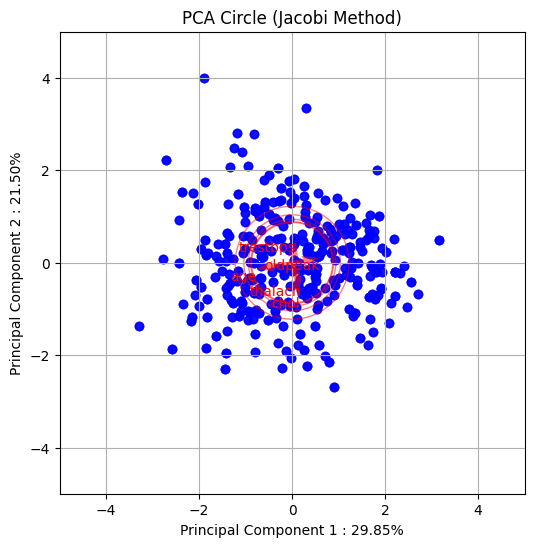

Epoch 1/50
21/21 [==============================] - 2s 21ms/step - loss: 0.6409 - accuracy: 0.6646 - val_loss: 0.6313 - val_accuracy: 0.6890
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.5494 - accuracy: 0.7607 - val_loss: 0.6080 - val_accuracy: 0.6829
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.7607 - val_loss: 0.6053 - val_accuracy: 0.6829
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4904 - accuracy: 0.7622 - val_loss: 0.6038 - val_accuracy: 0.6890
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7683 - val_loss: 0.5937 - val_accuracy: 0.6951
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4718 - accuracy: 0.7729 - val_loss: 0.5900 - val_accuracy: 0.6951
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 0.4660 - accuracy: 0.7729 - val_loss: 0.5849 - val_accuracy: 0.7073
Epoch 8/50
21/21 [=

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def jacobi_eigenvalue(A, tol=1e-10, max_iter=100):
    n = len(A)
    V = np.identity(n)  # Initial transformation matrix (identity matrix)
    num_iter = 0

    while num_iter < max_iter:
        off_diag = np.abs(A - np.diag(np.diag(A))).max()

        if off_diag < tol:
            break

        max_indices = np.unravel_index(
            np.argmax(np.abs(A - np.diag(np.diag(A))), axis=None), A.shape)
        i, j = max_indices
        theta = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])

        R = np.identity(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)

        A = np.dot(np.dot(R.T, A), R)
        V = np.dot(V, R)
        num_iter += 1

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = jacobi_eigenvalue(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components

projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle with features ( age pc1 threp is pc2)
for i, (magnitude, vector) in enumerate(zip(eigenvalue_magnitudes, eigenvectors.T)):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)
    plt.text(vector[0], vector[1], selected_features[i] , color='r', ha='right',va='top')
    #plt.text(correlation_matrix[0, i], correlation_matrix[1, i], selected_features[i], ha='center', va='center')


# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the SVM model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)



# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

###


7/7 [==============================] - 0s 3ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.838


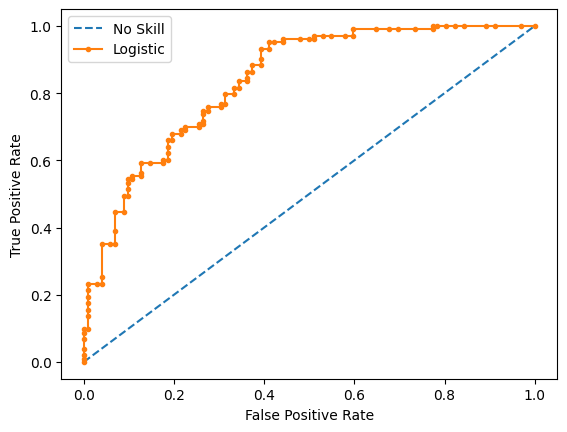

In [ ]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###simple neural network with ACP methode QR (83% acc) with 0.38 loss

Eigenvalues:
[2.67212626e+03 5.44694019e+02 3.04465320e+02 5.91203784e+01
 1.16706227e+00]
Variance Explained by Each Eigenvector:
Eigenvector 1: 74.61%
Eigenvector 2: 15.21%
Eigenvector 3: 8.50%
Eigenvector 4: 1.65%
Eigenvector 5: 0.03%


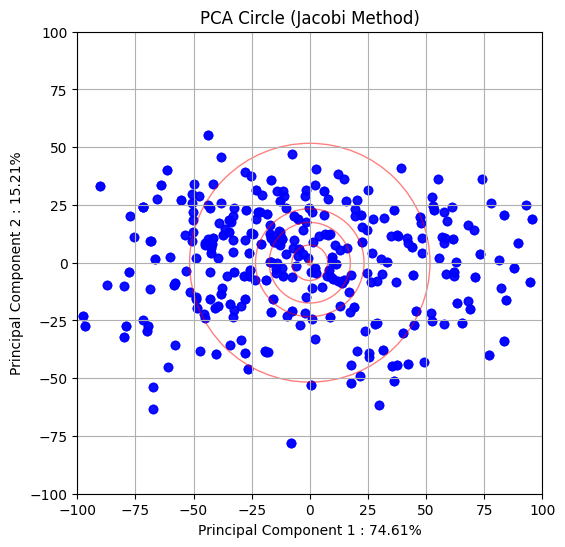

Epoch 1/50
21/21 [==============================] - 2s 17ms/step - loss: 1.0127 - accuracy: 0.6341 - val_loss: 0.9500 - val_accuracy: 0.5793
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5865 - accuracy: 0.7287 - val_loss: 0.7555 - val_accuracy: 0.6098
Epoch 3/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5410 - accuracy: 0.7348 - val_loss: 0.6864 - val_accuracy: 0.6646
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.4954 - accuracy: 0.7515 - val_loss: 0.6536 - val_accuracy: 0.6829
Epoch 5/50
21/21 [==============================] - 0s 14ms/step - loss: 0.4737 - accuracy: 0.7820 - val_loss: 0.6441 - val_accuracy: 0.7134
Epoch 6/50
21/21 [==============================] - 0s 8ms/step - loss: 0.4585 - accuracy: 0.7805 - val_loss: 0.6114 - val_accuracy: 0.7195
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4384 - accuracy: 0.8140 - val_loss: 0.5894 - val_accuracy: 0.7073
Epoch 8/50
21/21

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def qr_algorithm(matrix, num_iterations=100):
    n = matrix.shape[0]
    A = matrix
    eigenvectors = np.identity(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        eigenvectors = np.dot(eigenvectors, Q)
    eigenvalues = np.diagonal(A)
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    #eigenvalues, eigenvectors = jacobi_eigenvalue(cov)
    eigenvalues, eigenvectors = qr_algorithm(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-100, 100)
plt.ylim(-100, 100)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the  model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))




7/7 [==============================] - 0s 4ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.708


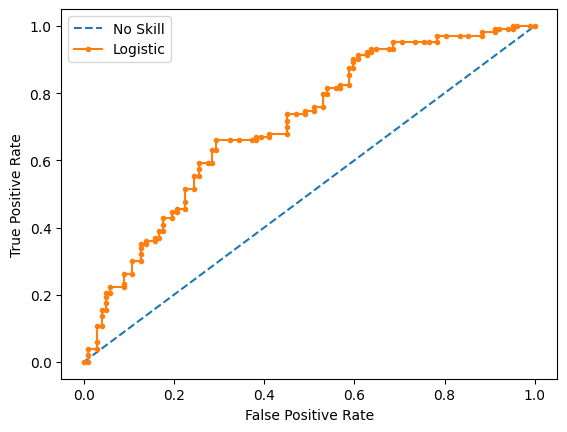

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###pca Power iteration (75% accuracy) with 0.10 loss

Eigenvalues:
[2.67212626e+03 5.44694019e+02 3.04465320e+02 5.91203784e+01
 1.16706227e+00]
Variance Explained by Each Eigenvector:
Eigenvector 1: 74.61%
Eigenvector 2: 15.21%
Eigenvector 3: 8.50%
Eigenvector 4: 1.65%
Eigenvector 5: 0.03%
Execution Time: 0.04 seconds


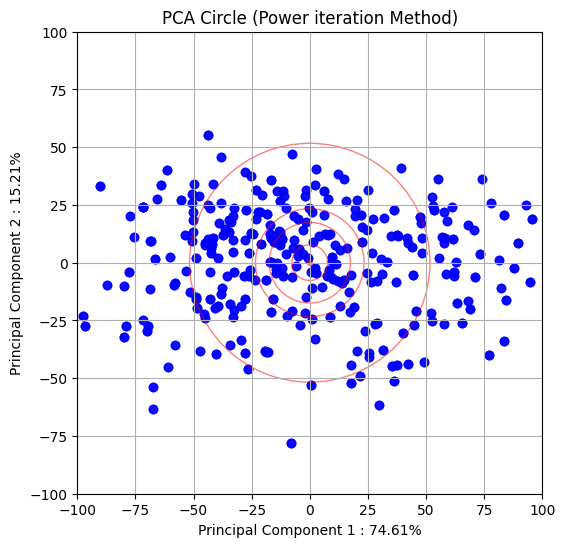

Epoch 1/50
21/21 [==============================] - 1s 11ms/step - loss: 1.2316 - accuracy: 0.5777 - val_loss: 1.0127 - val_accuracy: 0.6341
Epoch 2/50
21/21 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.7226 - val_loss: 0.7970 - val_accuracy: 0.6159
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.7271 - val_loss: 0.6850 - val_accuracy: 0.6098
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.5337 - accuracy: 0.7393 - val_loss: 0.6171 - val_accuracy: 0.6402
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.7652 - val_loss: 0.6055 - val_accuracy: 0.7012
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7530 - val_loss: 0.5936 - val_accuracy: 0.7012
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7790 - val_loss: 0.5637 - val_accuracy: 0.6890
Epoch 8/50
21/21 [=

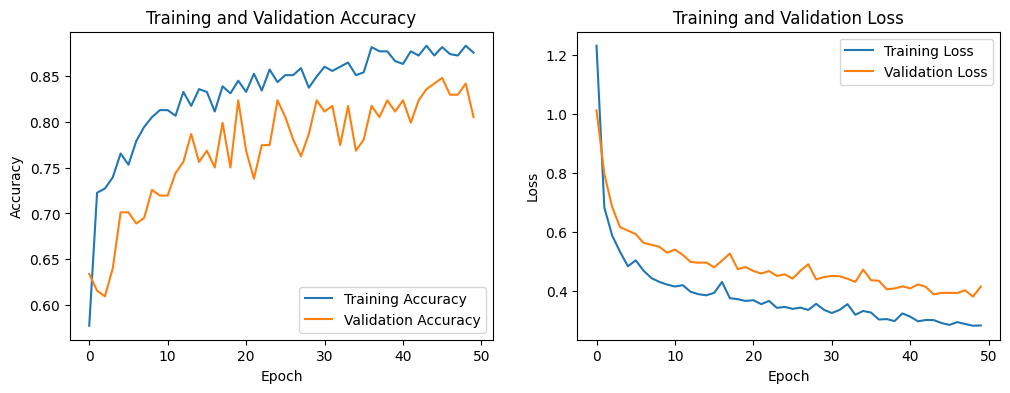

In [ ]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def power_iteration(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            x = np.dot(matrix, x)
            eigenvalue = np.linalg.norm(x)
            x /= eigenvalue

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    #eigenvalues, eigenvectors = jacobi_eigenvalue(cov)
    #eigenvalues, eigenvectors = qr_algorithm(cov)
    eigenvalues, eigenvectors = power_iteration(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances



# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Record the start time
start_time = time.time()
# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-100, 100)
plt.ylim(-100, 100)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Power iteration Method)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
#pca = PCA(n_components=2)  # Choose the number of components based on explained variance
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model and get the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the SVM model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))



7/7 [==============================] - 0s 4ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.696


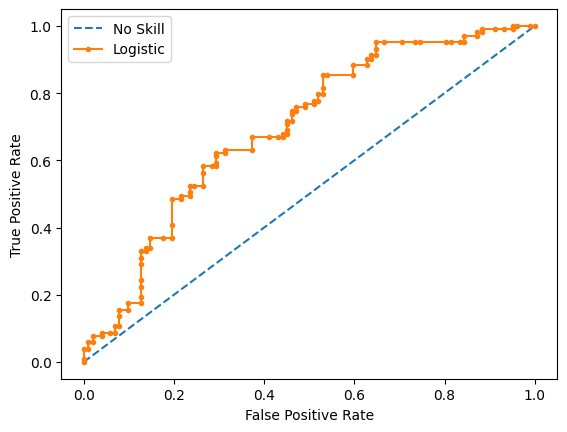

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###acceleration

Power Method with Deflation (Acceleration):



After obtaining the i-th eigenvalue and eigenvector, the method performs an additional power iteration step with deflation.
The matrix matrix is updated by subtracting the outer product of the computed eigenvector x with itself, scaled by the eigenvalue.
This step is a deflation technique that removes the contribution of the i-th eigenvalue/eigenvector, allowing for acceleration in finding subsequent eigenvalues.
Acceleration Update:

The method computes an accelerated version of the eigenvector x by adding the result of another power iteration step.
The result is a vector x_accelerated that is used to update the eigenvector matrix.

Eigenvalues:
[1583.40393879  347.3692187   335.91718545  110.63371854 -245.4789626 ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 74.27%
Eigenvector 2: 16.29%
Eigenvector 3: 15.76%
Eigenvector 4: 5.19%
Eigenvector 5: -11.51%


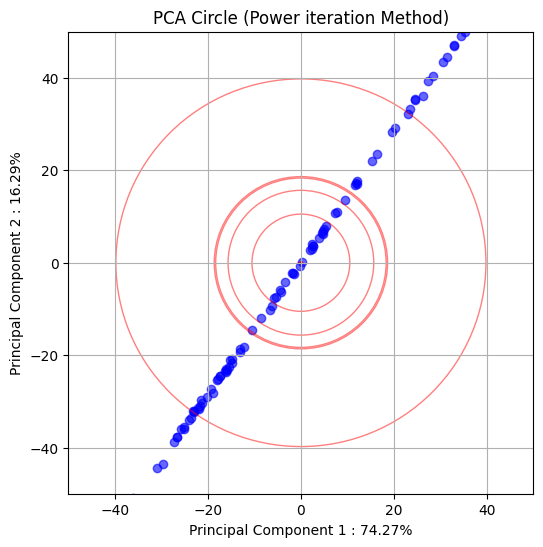

Execution Time: 0.05 seconds
Epoch 1/50
2/2 [==============================] - 3s 291ms/step - loss: 1.9326 - accuracy: 0.4688 - val_loss: 2.6364 - val_accuracy: 0.1875
Epoch 2/50
2/2 [==============================] - 0s 71ms/step - loss: 0.8648 - accuracy: 0.6562 - val_loss: 1.0488 - val_accuracy: 0.5625
Epoch 3/50
2/2 [==============================] - 0s 64ms/step - loss: 0.6847 - accuracy: 0.8281 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 4/50
2/2 [==============================] - 0s 67ms/step - loss: 0.9152 - accuracy: 0.5781 - val_loss: 0.5999 - val_accuracy: 0.5625
Epoch 5/50
2/2 [==============================] - 0s 54ms/step - loss: 0.7252 - accuracy: 0.8281 - val_loss: 1.0312 - val_accuracy: 0.5625
Epoch 6/50
2/2 [==============================] - 0s 72ms/step - loss: 0.7635 - accuracy: 0.8281 - val_loss: 1.2411 - val_accuracy: 0.5625
Epoch 7/50
2/2 [==============================] - 0s 77ms/step - loss: 0.7532 - accuracy: 0.8281 - val_loss: 1.1943 - val_accuracy: 0.56

In [ ]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def power_iteration(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            x = np.dot(matrix, x)
            eigenvalue = np.linalg.norm(x)
            x /= eigenvalue

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    # Apply accelerated conjugate gradient for PCA
    eigenvalues, eigenvectors = power_iteration_accelerated(cov, num_iterations=100, alpha=0.1)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances

# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')

# Record the start time
start_time = time.time()
# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))

# Record the end time
end_time = time.time()

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-50, 50)
plt.ylim(-50, 50)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Power iteration Method)')
plt.grid()
plt.show()



# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
#pca = PCA(n_components=2)  # Choose the number of components based on explained variance
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

###Accelartion with faster pca caclculation


Eigenvalues:
[1.17407331 0.58699366 0.29352499 0.14688248 0.07325603]
Variance Explained by Each Eigenvector:
Eigenvector 1: 51.61%
Eigenvector 2: 25.80%
Eigenvector 3: 12.90%
Eigenvector 4: 6.46%
Eigenvector 5: 3.22%
Execution Time: 0.04 seconds


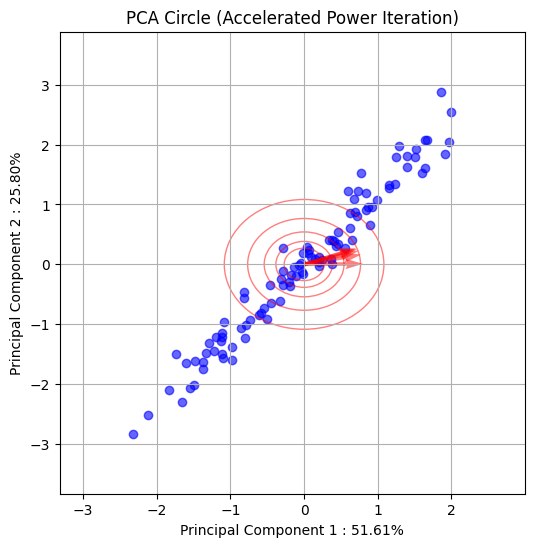

Epoch 1/30
2/2 [==============================] - 1s 250ms/step - loss: 0.6822 - accuracy: 0.7031 - val_loss: 0.6833 - val_accuracy: 0.6250
Epoch 2/30
2/2 [==============================] - 0s 61ms/step - loss: 0.6581 - accuracy: 0.7969 - val_loss: 0.6752 - val_accuracy: 0.5625
Epoch 3/30
2/2 [==============================] - 0s 42ms/step - loss: 0.6353 - accuracy: 0.8281 - val_loss: 0.6708 - val_accuracy: 0.5625
Epoch 4/30
2/2 [==============================] - 0s 64ms/step - loss: 0.6176 - accuracy: 0.8281 - val_loss: 0.6650 - val_accuracy: 0.5625
Epoch 5/30
2/2 [==============================] - 0s 66ms/step - loss: 0.6008 - accuracy: 0.8281 - val_loss: 0.6629 - val_accuracy: 0.5625
Epoch 6/30
2/2 [==============================] - 0s 62ms/step - loss: 0.5889 - accuracy: 0.8281 - val_loss: 0.6620 - val_accuracy: 0.5625
Epoch 7/30
2/2 [==============================] - 0s 43ms/step - loss: 0.5767 - accuracy: 0.8281 - val_loss: 0.6632 - val_accuracy: 0.5625
Epoch 8/30
2/2 [==========

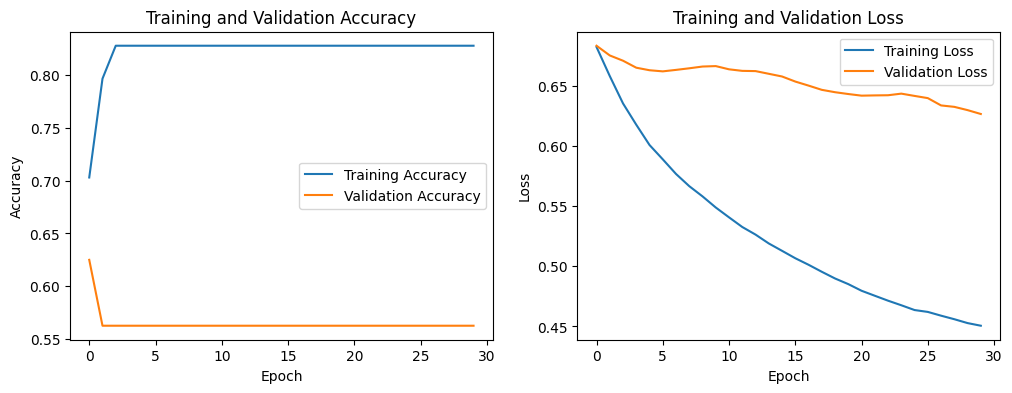

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def pca_with_acceleration(matrix):
    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - mean

    sigma = np.std(centered_matrix, axis=0)
    scaled_matrix = centered_matrix / sigma

    cov_matrix = np.cov(scaled_matrix, rowvar=False)

    eigenvalues, eigenvectors = power_iteration_accelerated(cov_matrix, num_iterations=500, alpha=0.1)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
      print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(scaled_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances



# Load heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')

# Extract relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values
# Record the start time
start_time = time.time()
# Apply PCA with acceleration
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca_with_acceleration(matrix)
# Record the end time
end_time = time.time()
# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))



# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits based on the maximum and minimum values of the projected components
plt.xlim(np.min(projected_matrix[:, 0]) - 1, np.max(projected_matrix[:, 0]) + 1)
plt.ylim(np.min(projected_matrix[:, 1]) - 1, np.max(projected_matrix[:, 1]) + 1)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Accelerated Power Iteration)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
#pca = PCA(n_components=2)  # Choose the number of components based on explained variance
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the training history
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

###Perform power iteration to find the dominant eigenvalue and eigenvector.

Execution Time: 0.10 seconds


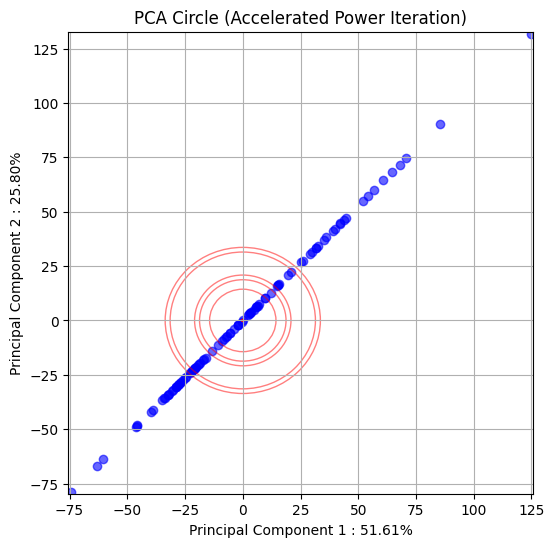

Epoch 1/30
2/2 [==============================] - 5s 777ms/step - loss: 0.9981 - accuracy: 0.6406 - val_loss: 0.5529 - val_accuracy: 0.5625
Epoch 2/30
2/2 [==============================] - 0s 83ms/step - loss: 0.6429 - accuracy: 0.8281 - val_loss: 1.0492 - val_accuracy: 0.5625
Epoch 3/30
2/2 [==============================] - 0s 100ms/step - loss: 0.6189 - accuracy: 0.8281 - val_loss: 1.3060 - val_accuracy: 0.5625
Epoch 4/30
2/2 [==============================] - 0s 134ms/step - loss: 0.6273 - accuracy: 0.8281 - val_loss: 1.3777 - val_accuracy: 0.5625
Epoch 5/30
2/2 [==============================] - 0s 178ms/step - loss: 0.6457 - accuracy: 0.8281 - val_loss: 1.2500 - val_accuracy: 0.5625
Epoch 6/30
2/2 [==============================] - 0s 172ms/step - loss: 0.6142 - accuracy: 0.8281 - val_loss: 1.0018 - val_accuracy: 0.5625
Epoch 7/30
2/2 [==============================] - 0s 91ms/step - loss: 0.5654 - accuracy: 0.8281 - val_loss: 0.7005 - val_accuracy: 0.5625
Epoch 8/30
2/2 [======

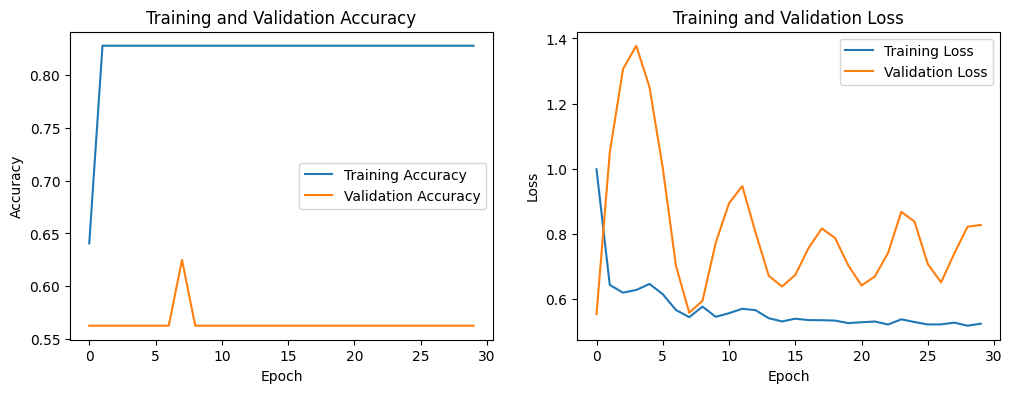

In [ ]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def pca_with_acceleration(matrix, num_components=None, num_iterations=500, alpha=0.1):
    n_rows, n_columns = matrix.shape
    if num_components is None:
        num_components = min(n_rows, n_columns)

    mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - mean

    cov_matrix = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = power_iteration_accelerated(cov_matrix, num_iterations, alpha)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    # Choose the top 'num_components' eigenvectors
    eigenvectors = eigenvectors[:, :num_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors



# Load heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/sample1.csv')

# Extract relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values
# Record the start time
start_time = time.time()
# Apply PCA with acceleration
projected_matrix, eigenvalues, eigenvectors = pca_with_acceleration(matrix)
# Record the end time
end_time = time.time()
# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))



# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits based on the maximum and minimum values of the projected components
plt.xlim(np.min(projected_matrix[:, 0]) - 1, np.max(projected_matrix[:, 0]) + 1)
plt.ylim(np.min(projected_matrix[:, 1]) - 1, np.max(projected_matrix[:, 1]) + 1)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Accelerated Power Iteration)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
#pca = PCA(n_components=2)  # Choose the number of components based on explained variance
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and get the training history
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


#PCA power iteration usage on knn svm and lstm

###WIth svm 64%

Eigenvalues:
[1.14251897 0.57390882 0.31055186 0.07588354 0.04188804]
Variance Explained by Each Eigenvector:
Eigenvector 1: 53.27%
Eigenvector 2: 26.76%
Eigenvector 3: 14.48%
Eigenvector 4: 3.54%
Eigenvector 5: 1.95%


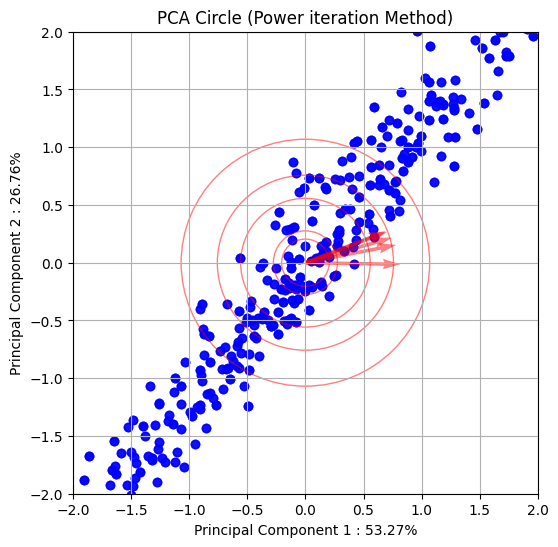

Execution Time: 0.03 seconds
SVM Test Accuracy: 65.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       102
           1       0.65      0.69      0.67       103

    accuracy                           0.66       205
   macro avg       0.66      0.66      0.66       205
weighted avg       0.66      0.66      0.66       205



In [ ]:
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def power_iteration(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            x = np.dot(matrix, x)
            eigenvalue = np.linalg.norm(x)
            x /= eigenvalue

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def pca(matrix):
    n_rows, n_columns = matrix.shape
    mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - mean

    sigma = np.std(centered_matrix, axis=0)
    scaled_matrix = centered_matrix / sigma

    cov_matrix = np.cov(scaled_matrix, rowvar=False)

    eigenvalues, eigenvectors = power_iteration_accelerated(cov_matrix, num_iterations=100, alpha=0.1)

    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(scaled_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances

# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Record the start time
start_time = time.time()
# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA
projected_matrix,eigenvalues,eigenvectors,explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))

# Record the end time
end_time = time.time()

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Power iteration Method)')
plt.grid()
plt.show()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0)
best_svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model on the test set
accuracy = best_svm_model.score(X_test_scaled, y_test)
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the SVM model on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


7/7 [==============================] - 0s 3ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


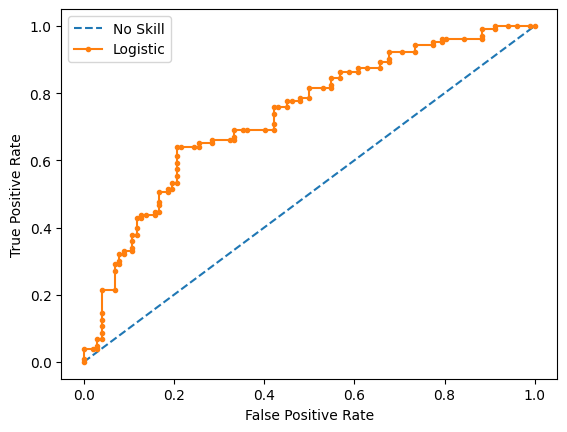

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###with knn 87%

Eigenvalues:
[1.14180554 0.53779008 0.25238102 0.11576262 0.05419424]
Variance Explained by Each Eigenvector:
Eigenvector 1: 54.32%
Eigenvector 2: 25.59%
Eigenvector 3: 12.01%
Eigenvector 4: 5.51%
Eigenvector 5: 2.58%


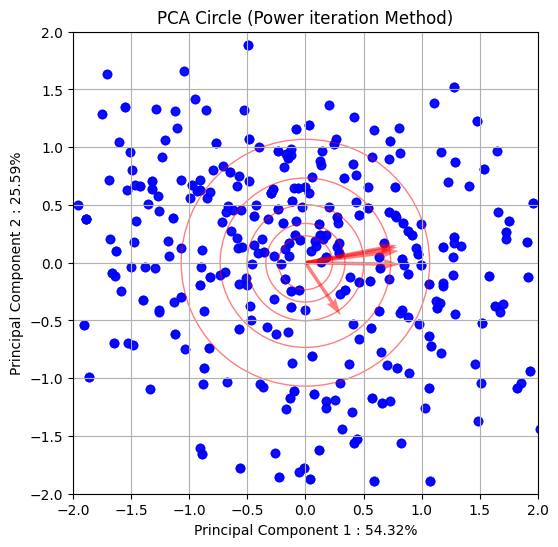

Execution Time: 0.03 seconds
KNN Accuracy: 86.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       102
           1       0.89      0.84      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

accuracy_score: 86.82926829268293
precision: 88.77551020408163
f1 score: 86.56716417910448
recall_score: 84.46601941747572


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def power_iteration(matrix, num_iterations=100):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            x = np.dot(matrix, x)
            eigenvalue = np.linalg.norm(x)
            x /= eigenvalue

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def pca(matrix):
    n_rows, n_columns = matrix.shape
    mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - mean

    sigma = np.std(centered_matrix, axis=0)
    scaled_matrix = centered_matrix / sigma

    cov_matrix = np.cov(scaled_matrix, rowvar=False)

    eigenvalues, eigenvectors = power_iteration_accelerated(cov_matrix, num_iterations=100, alpha=0.1)

    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(scaled_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances

# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Record the start time
start_time = time.time()
# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA
projected_matrix,eigenvalues,eigenvectors,explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))

# Record the end time
end_time = time.time()

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Power iteration Method)')
plt.grid()
plt.show()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the number of neighbors (k) for KNN
k_neighbors = 3  # Adjust as needed
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')


# Evaluate the SVM model on the test set
y_pred = knn.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.868


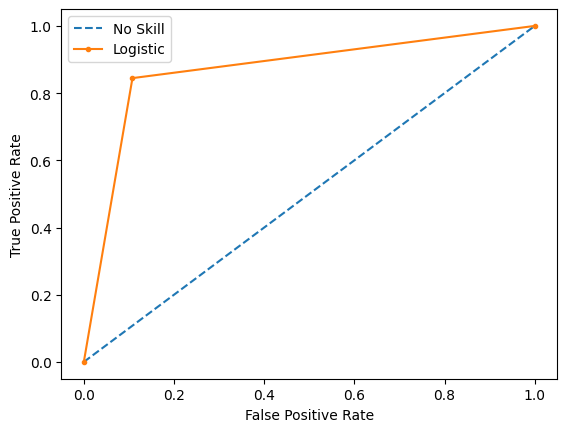

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###LSTM 67%

Eigenvalues:
[1.14209824 0.60519351 0.25984039 0.05123764 0.02882312]
Variance Explained by Each Eigenvector:
Eigenvector 1: 54.72%
Eigenvector 2: 29.00%
Eigenvector 3: 12.45%
Eigenvector 4: 2.45%
Eigenvector 5: 1.38%


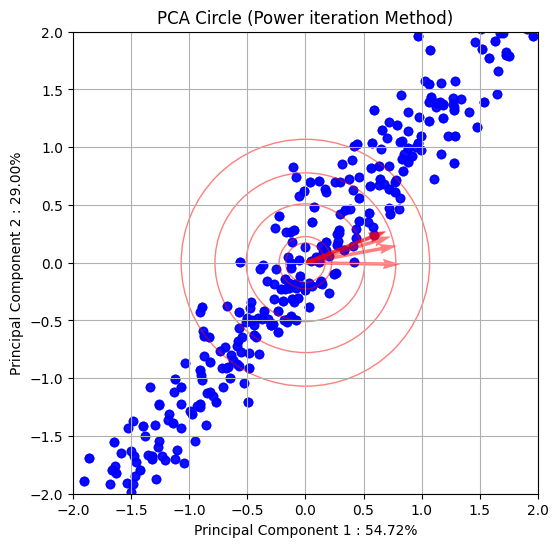

Execution Time: 0.05 seconds
Epoch 1/10
21/21 [==============================] - 12s 115ms/step - loss: 0.6708 - accuracy: 0.6555 - val_loss: 0.6596 - val_accuracy: 0.6646
Epoch 2/10
21/21 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.7195 - val_loss: 0.6412 - val_accuracy: 0.6646
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 0.5884 - accuracy: 0.7210 - val_loss: 0.6374 - val_accuracy: 0.6646
Epoch 4/10
21/21 [==============================] - 0s 10ms/step - loss: 0.5728 - accuracy: 0.7195 - val_loss: 0.6403 - val_accuracy: 0.6646
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.5668 - accuracy: 0.7134 - val_loss: 0.6450 - val_accuracy: 0.6646
Epoch 6/10
21/21 [==============================] - 0s 14ms/step - loss: 0.5636 - accuracy: 0.7134 - val_loss: 0.6476 - val_accuracy: 0.6646
Epoch 7/10
21/21 [==============================] - 0s 13ms/step - loss: 0.5622 - accuracy: 0.7149 - val_loss: 0.6492 - val_

In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def power_iteration_accelerated(matrix, num_iterations=100, alpha=0.1):
    n = matrix.shape[0]
    eigenvalues = []
    eigenvectors = np.zeros((n, n))

    for i in range(n):
        x = np.random.rand(n)
        x /= np.linalg.norm(x)

        for _ in range(num_iterations):
            Ax = np.dot(matrix, x)
            eigenvalue = np.dot(x, Ax) / np.dot(x, x) + alpha
            x = Ax - eigenvalue * x
            x /= np.linalg.norm(x)

        eigenvalues.append(eigenvalue)
        eigenvectors[:, i] = x

        matrix -= eigenvalue * np.outer(x, x)

    return np.array(eigenvalues), eigenvectors

def pca(matrix):
    n_rows, n_columns = matrix.shape
    mean = np.mean(matrix, axis=0)
    centered_matrix = matrix - mean

    sigma = np.std(centered_matrix, axis=0)
    scaled_matrix = centered_matrix / sigma

    cov_matrix = np.cov(scaled_matrix, rowvar=False)

    eigenvalues, eigenvectors = power_iteration_accelerated(cov_matrix, num_iterations=100, alpha=0.1)

    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(scaled_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances

# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Record the start time
start_time = time.time()
# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA
projected_matrix,eigenvalues,eigenvectors,explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(np.abs(eigenvalues))

# Record the end time
end_time = time.time()

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Power iteration Method)')
plt.grid()
plt.show()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# LSTM model on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")


# Evaluate the SVM model on the test set
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.673


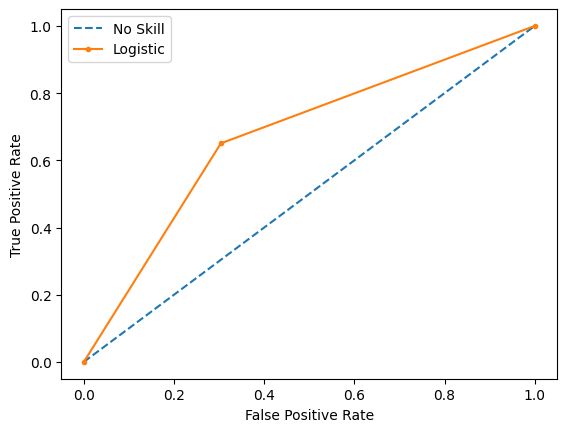

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#PCA with QR method using SVM ,KNN ,lstm

###WITH SVM 85%

Eigenvalues:
[1.80535113 1.07657863 0.88435897 0.75945811 0.47913598]
Variance Explained by Each Eigenvector:
Eigenvector 1: 36.07%
Eigenvector 2: 21.51%
Eigenvector 3: 17.67%
Eigenvector 4: 15.17%
Eigenvector 5: 9.57%


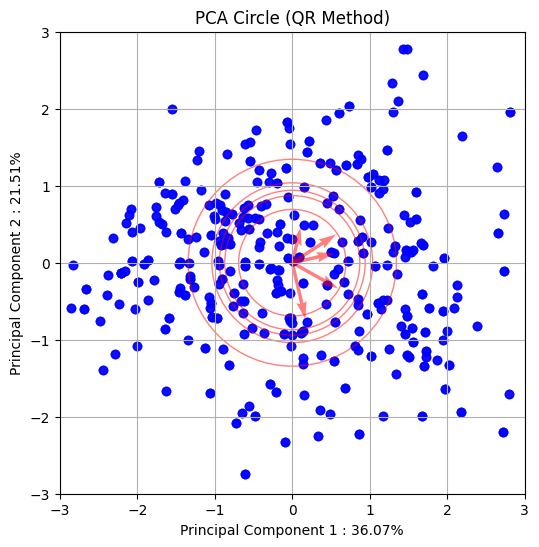

SVM Test Accuracy: 85.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       102
           1       0.78      0.91      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

accuracy_score: 82.4390243902439
precision: 77.68595041322314
f1 score: 83.92857142857142
recall_score: 91.2621359223301


In [ ]:
import numpy as np
import time
from sklearn.model_selection import GridSearchCV

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def qr_algorithm(matrix, num_iterations=100):
    n = matrix.shape[0]
    A = matrix
    eigenvectors = np.identity(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        eigenvectors = np.dot(eigenvectors, Q)
    eigenvalues = np.diagonal(A)
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    #eigenvalues, eigenvectors = jacobi_eigenvalue(cov)
    eigenvalues, eigenvectors = qr_algorithm(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (QR Method)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0)
best_svm_model.fit(X_train_scaled, y_train)


# Evaluate the SVM model on the test set
accuracy = best_svm_model.score(X_test_scaled, y_test)
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the SVM model on the test set
y_pred = best_svm_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


7/7 [==============================] - 0s 3ms/step
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.547


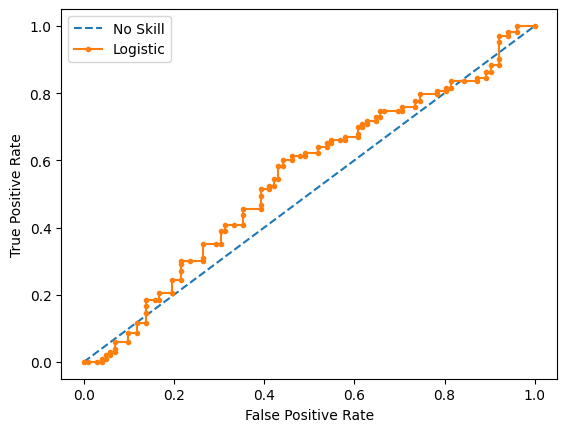

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Predict probabilities
y_pred_probs = model.predict(X_test_scaled)

# Extract probabilities for the positive class (assuming it's class 1)
lr_probs = y_pred_probs[:, 0]  # Replace 0 with the index corresponding to the positive class

# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### WITH knn 89%

Eigenvalues:
[1.80535113 1.07657863 0.88435897 0.75945811 0.47913598]
Variance Explained by Each Eigenvector:
Eigenvector 1: 36.07%
Eigenvector 2: 21.51%
Eigenvector 3: 17.67%
Eigenvector 4: 15.17%
Eigenvector 5: 9.57%


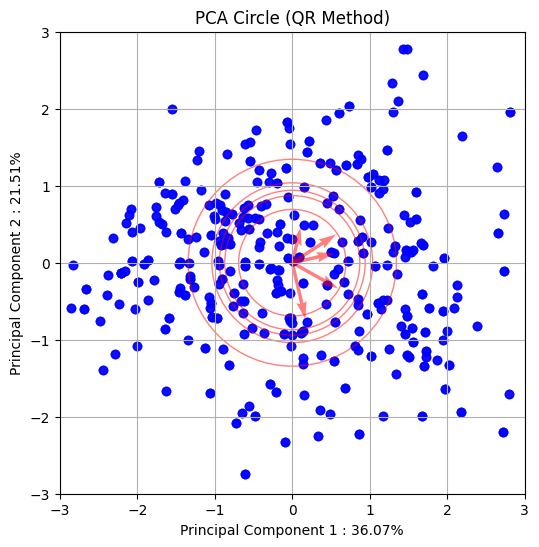

KNN Accuracy: 89.27%
Confusion Matrix:
[[92 10]
 [12 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       102
           1       0.90      0.88      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

accuracy_score: 89.26829268292683
precision: 90.0990099009901
f1 score: 89.21568627450982
recall_score: 88.3495145631068


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report


def qr_algorithm(matrix, num_iterations=100):
    n = matrix.shape[0]
    A = matrix
    eigenvectors = np.identity(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        eigenvectors = np.dot(eigenvectors, Q)
    eigenvalues = np.diagonal(A)
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    #eigenvalues, eigenvectors = jacobi_eigenvalue(cov)
    eigenvalues, eigenvectors = qr_algorithm(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (QR Method)')
plt.grid()
plt.show()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Choose the number of neighbors (k) for KNN
k_neighbors = 3  # Adjust as needed
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Evaluate the SVM model on the test set
y_pred = knn.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.893


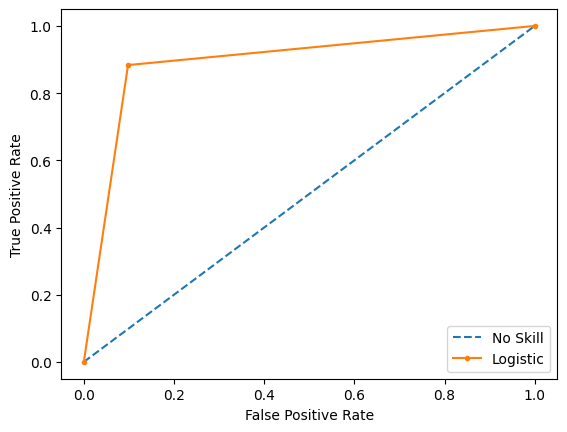

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()





### WITH LSTM 67%

Eigenvalues:
[1.80535113 1.07657863 0.88435897 0.75945811 0.47913598]
Variance Explained by Each Eigenvector:
Eigenvector 1: 36.07%
Eigenvector 2: 21.51%
Eigenvector 3: 17.67%
Eigenvector 4: 15.17%
Eigenvector 5: 9.57%


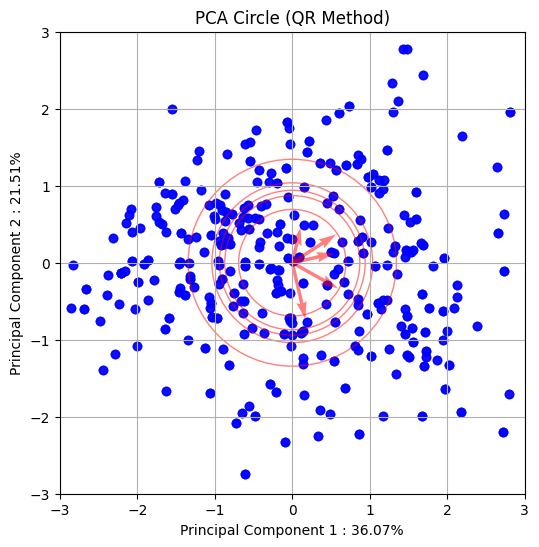

Epoch 1/10
21/21 [==============================] - 4s 50ms/step - loss: 0.6686 - accuracy: 0.7195 - val_loss: 0.6700 - val_accuracy: 0.6463
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.7637 - val_loss: 0.6552 - val_accuracy: 0.6524
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.7668 - val_loss: 0.6404 - val_accuracy: 0.6524
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 0.6003 - accuracy: 0.7759 - val_loss: 0.6258 - val_accuracy: 0.6707
Epoch 5/10
21/21 [==============================] - 0s 7ms/step - loss: 0.5765 - accuracy: 0.7744 - val_loss: 0.6130 - val_accuracy: 0.6707
Epoch 6/10
21/21 [==============================] - 0s 8ms/step - loss: 0.5547 - accuracy: 0.7698 - val_loss: 0.6013 - val_accuracy: 0.6707
Epoch 7/10
21/21 [==============================] - 0s 11ms/step - loss: 0.5347 - accuracy: 0.7668 - val_loss: 0.5926 - val_accuracy: 0.6646
Epoch 8/10
21/21 [

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def qr_algorithm(matrix, num_iterations=100):
    n = matrix.shape[0]
    A = matrix
    eigenvectors = np.identity(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = np.dot(R, Q)
        eigenvectors = np.dot(eigenvectors, Q)
    eigenvalues = np.diagonal(A)
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    #eigenvalues, eigenvectors = jacobi_eigenvalue(cov)
    eigenvalues, eigenvectors = qr_algorithm(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle
for magnitude, vector in zip(eigenvalue_magnitudes, eigenvectors.T):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)

# Set axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (QR Method)')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# LSTM model on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")
# Evaluate the SVM model on the test set


# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.668


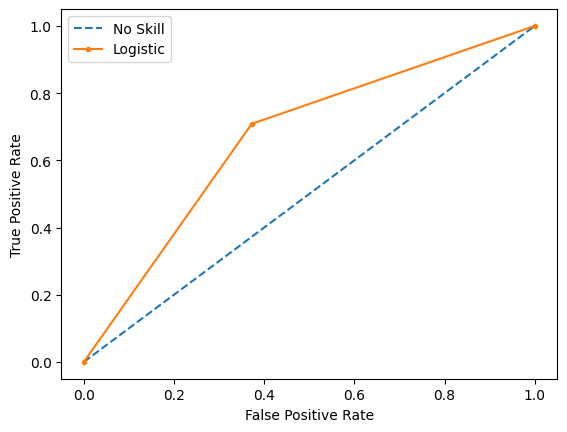

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#PCA with Jacobi using SVM ,KNN ,lstm

###WITH SVM 85%

Eigenvalues:
[1.49386786 1.07628014 0.88443145 0.79003997 0.7602634 ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 29.85%
Eigenvector 2: 21.50%
Eigenvector 3: 17.67%
Eigenvector 4: 15.79%
Eigenvector 5: 15.19%


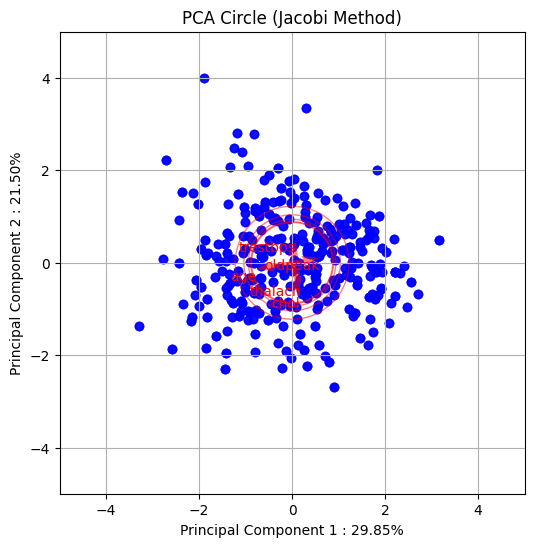

SVM Test Accuracy: 85.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       102
           1       0.81      0.93      0.86       103

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

accuracy_score: 85.36585365853658
precision: 80.67226890756302
f1 score: 86.48648648648648
recall_score: 93.20388349514563


In [ ]:
import numpy as np
import time
from sklearn.model_selection import GridSearchCV

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def jacobi_eigenvalue(A, tol=1e-10, max_iter=100):
    n = len(A)
    V = np.identity(n)  # Initial transformation matrix (identity matrix)
    num_iter = 0

    while num_iter < max_iter:
        off_diag = np.abs(A - np.diag(np.diag(A))).max()

        if off_diag < tol:
            break

        max_indices = np.unravel_index(
            np.argmax(np.abs(A - np.diag(np.diag(A))), axis=None), A.shape)
        i, j = max_indices
        theta = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])

        R = np.identity(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)

        A = np.dot(np.dot(R.T, A), R)
        V = np.dot(V, R)
        num_iter += 1

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = jacobi_eigenvalue(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle with features ( age pc1 threp is pc2)
for i, (magnitude, vector) in enumerate(zip(eigenvalue_magnitudes, eigenvectors.T)):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)
    plt.text(vector[0], vector[1], selected_features[i] , color='r', ha='right',va='top')
    #plt.text(correlation_matrix[0, i], correlation_matrix[1, i], selected_features[i], ha='center', va='center')


# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
# Train an SVM model
svm_model = SVC(kernel='linear', C=1.0)
best_svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model on the test set
accuracy = best_svm_model.score(X_test_scaled, y_test)
print(f"SVM Test Accuracy: {accuracy * 100:.2f}%")

# Evaluate the SVM model on the test set
y_pred = best_svm_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)



# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.853


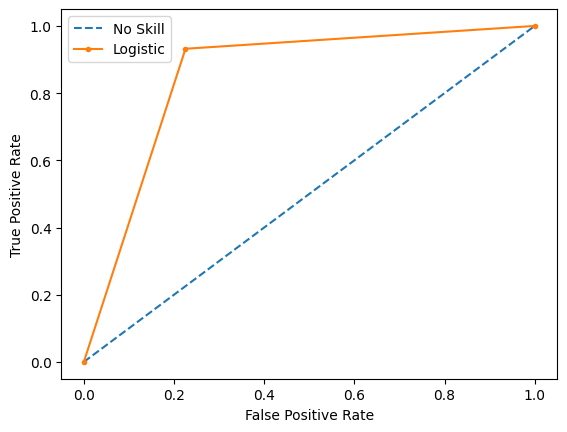

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot



# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### WITH knn 89%

Eigenvalues:
[1.49386786 1.07628014 0.88443145 0.79003997 0.7602634 ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 29.85%
Eigenvector 2: 21.50%
Eigenvector 3: 17.67%
Eigenvector 4: 15.79%
Eigenvector 5: 15.19%


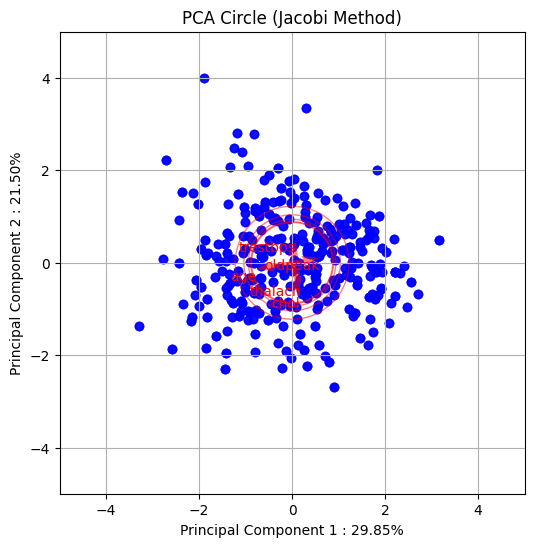

KNN Accuracy: 89.27%
accuracy_score: 89.26829268292683
precision: 90.0990099009901
f1 score: 89.21568627450982
recall_score: 88.3495145631068


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def jacobi_eigenvalue(A, tol=1e-10, max_iter=100):
    n = len(A)
    V = np.identity(n)  # Initial transformation matrix (identity matrix)
    num_iter = 0

    while num_iter < max_iter:
        off_diag = np.abs(A - np.diag(np.diag(A))).max()

        if off_diag < tol:
            break

        max_indices = np.unravel_index(
            np.argmax(np.abs(A - np.diag(np.diag(A))), axis=None), A.shape)
        i, j = max_indices
        theta = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])

        R = np.identity(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)

        A = np.dot(np.dot(R.T, A), R)
        V = np.dot(V, R)
        num_iter += 1

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = jacobi_eigenvalue(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle with features ( age pc1 threp is pc2)
for i, (magnitude, vector) in enumerate(zip(eigenvalue_magnitudes, eigenvectors.T)):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)
    plt.text(vector[0], vector[1], selected_features[i] , color='r', ha='right',va='top')
    #plt.text(correlation_matrix[0, i], correlation_matrix[1, i], selected_features[i], ha='center', va='center')


# Set axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Choose the number of neighbors (k) for KNN
k_neighbors = 3  # Adjust as needed
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.893


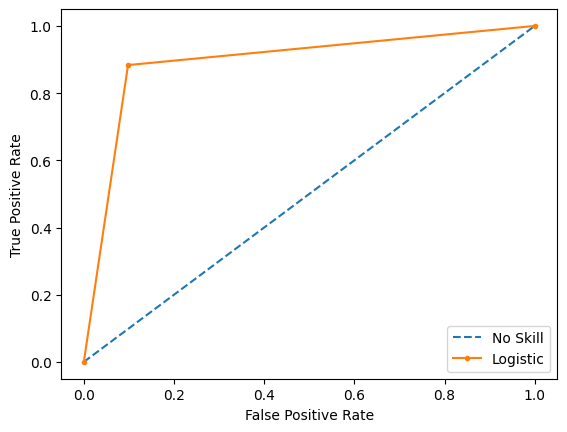

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### WITH LSTM 66.83%

Eigenvalues:
[1.49386786 1.07628014 0.88443145 0.79003997 0.7602634 ]
Variance Explained by Each Eigenvector:
Eigenvector 1: 29.85%
Eigenvector 2: 21.50%
Eigenvector 3: 17.67%
Eigenvector 4: 15.79%
Eigenvector 5: 15.19%


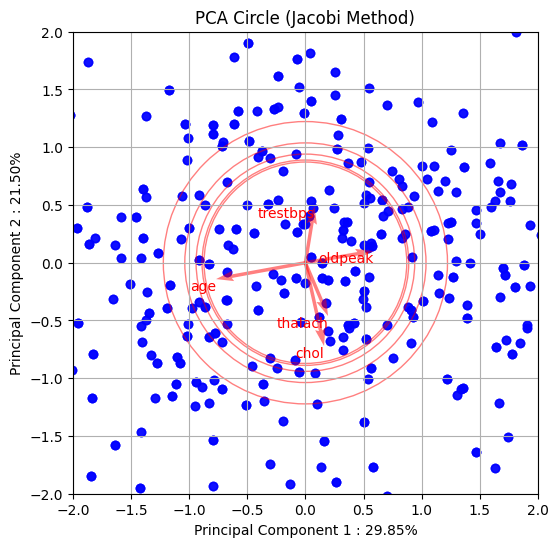

Epoch 1/10
21/21 [==============================] - 3s 30ms/step - loss: 0.6795 - accuracy: 0.6372 - val_loss: 0.6717 - val_accuracy: 0.6280
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.7271 - val_loss: 0.6517 - val_accuracy: 0.6463
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.7515 - val_loss: 0.6343 - val_accuracy: 0.6524
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5909 - accuracy: 0.7515 - val_loss: 0.6175 - val_accuracy: 0.6524
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7470 - val_loss: 0.6033 - val_accuracy: 0.6524
Epoch 6/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7470 - val_loss: 0.5932 - val_accuracy: 0.6524
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.5221 - accuracy: 0.7439 - val_loss: 0.5863 - val_accuracy: 0.6524
Epoch 8/10
21/21 [=

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def jacobi_eigenvalue(A, tol=1e-10, max_iter=100):
    n = len(A)
    V = np.identity(n)  # Initial transformation matrix (identity matrix)
    num_iter = 0

    while num_iter < max_iter:
        off_diag = np.abs(A - np.diag(np.diag(A))).max()

        if off_diag < tol:
            break

        max_indices = np.unravel_index(
            np.argmax(np.abs(A - np.diag(np.diag(A))), axis=None), A.shape)
        i, j = max_indices
        theta = 0.5 * np.arctan2(2 * A[i, j], A[j, j] - A[i, i])

        R = np.identity(n)
        R[i, i] = np.cos(theta)
        R[j, j] = np.cos(theta)
        R[i, j] = -np.sin(theta)
        R[j, i] = np.sin(theta)

        A = np.dot(np.dot(R.T, A), R)
        V = np.dot(V, R)
        num_iter += 1

    eigenvalues = np.diag(A)
    eigenvectors = V
    return eigenvalues, eigenvectors


def pca(matrix):

    n_rows, n_columns = len(matrix), len(matrix[0])

    mean = [0] * n_columns
    for j in range(n_columns):
        column_sum = 0
        for i in range(n_rows):
            column_sum += matrix[i][j]
        mean[j] = column_sum / n_rows

    centered_matrix = [[matrix[i][j] - mean[j] for j in range(n_columns)] for i in range(n_rows)]

    sigma = [0] * n_columns
    for j in range(n_columns):
        sum_squared = 0
        for i in range(n_rows):
            sum_squared += centered_matrix[i][j] ** 2
        sigma[j] = (sum_squared / n_rows) ** 0.5

    reduced_matrix = [[centered_matrix[i][j] / sigma[j] for j in range(n_columns)] for i in range(n_rows)]
    #print("Centered and Reduced Matrix:")

    cov = np.cov(centered_matrix, rowvar=False)

    eigenvalues, eigenvectors = jacobi_eigenvalue(cov)

    # Sort eigenvalues and eigenvectors in descending order
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[eigenvalue_indices]
    eigenvectors = eigenvectors[:, eigenvalue_indices]

    print("Eigenvalues:")
    print(eigenvalues)

    total_variance = np.sum(eigenvalues)
    explained_variances = (eigenvalues / total_variance) * 100

    print("Variance Explained by Each Eigenvector:")
    for i, explained_variance in enumerate(explained_variances):
        print(f"Eigenvector {i + 1}: {explained_variance:.2f}%")

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    # Select the desired number of components
    #eigenvectors = eigenvectors[:, :n_components]

    projected_matrix = np.dot(centered_matrix, eigenvectors)

    return projected_matrix, eigenvalues, eigenvectors, explained_variances
#


# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for PCA
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply PCA with 5 components
#projected_matrix = pca(matrix_scaled, n_components=5)
projected_matrix, eigenvalues, eigenvectors, explained_variances = pca(matrix_scaled)

# Scatter plot of the data points
plt.figure(figsize=(6, 6))
plt.scatter(projected_matrix[:, 0], projected_matrix[:, 1], c='b', marker='o', alpha=0.6)

# Calculate eigenvalue magnitudes for PCA circle
eigenvalue_magnitudes = np.sqrt(eigenvalues)

# Draw PCA circle with features ( age pc1 threp is pc2)
for i, (magnitude, vector) in enumerate(zip(eigenvalue_magnitudes, eigenvectors.T)):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
    ellipse = plt.matplotlib.patches.Ellipse((0, 0), width=magnitude * 2, height=magnitude * 2, fill=False, color='r', alpha=0.5)
    plt.gca().add_patch(ellipse)
    plt.text(vector[0], vector[1], selected_features[i] , color='r', ha='right',va='top')
    #plt.text(correlation_matrix[0, i], correlation_matrix[1, i], selected_features[i], ha='center', va='center')


# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel(f'Principal Component 1 : {explained_variances[0]:.2f}%')
plt.ylabel(f'Principal Component 2 : {explained_variances[1]:.2f}%')

plt.title('PCA Circle (Jacobi Method)')
plt.grid()
plt.show()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(projected_matrix, heart_disease_data['target'], test_size=0.2, random_state=42)


# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

# LSTM model on the test set
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Test Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.663


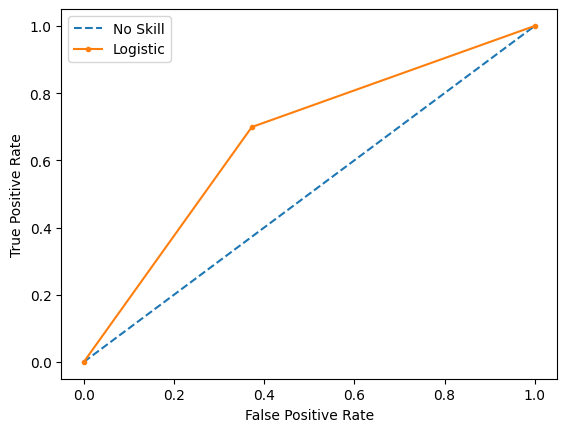

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

* FUZZY WTH ACP (mix entre acp et fuzzy)
* (using 50% with accuracy)
* algo genetique
* fuzzy only use

###Fuzzy acuraccy 77.58%


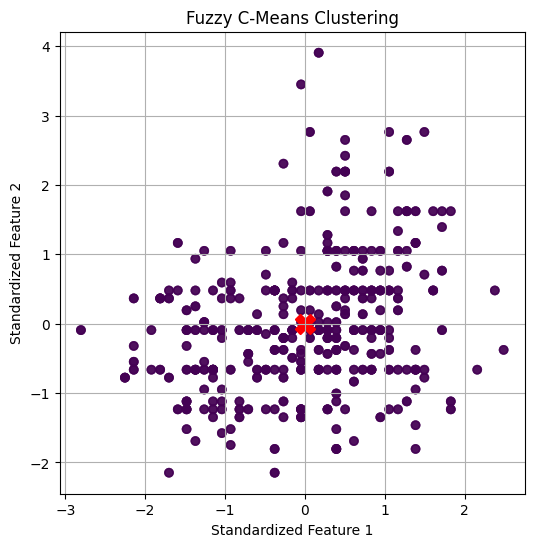

Epoch 1/50
13/13 [==============================] - 2s 44ms/step - loss: 0.6613 - accuracy: 0.6406 - val_loss: 0.6718 - val_accuracy: 0.6311
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 0.5949 - accuracy: 0.7433 - val_loss: 0.6529 - val_accuracy: 0.6602
Epoch 3/50
13/13 [==============================] - 0s 12ms/step - loss: 0.5453 - accuracy: 0.7579 - val_loss: 0.6447 - val_accuracy: 0.6505
Epoch 4/50
13/13 [==============================] - 0s 16ms/step - loss: 0.5134 - accuracy: 0.7457 - val_loss: 0.6421 - val_accuracy: 0.6311
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4912 - accuracy: 0.7751 - val_loss: 0.6465 - val_accuracy: 0.6408
Epoch 6/50
13/13 [==============================] - 0s 13ms/step - loss: 0.4804 - accuracy: 0.7653 - val_loss: 0.6504 - val_accuracy: 0.6311
Epoch 7/50
13/13 [==============================] - 0s 13ms/step - loss: 0.4710 - accuracy: 0.7677 - val_loss: 0.6466 - val_accuracy: 0.6311
Epoch 8/50
13/

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import pairwise_distances_argmin_min  # Add this import
import matplotlib.pyplot as plt


def fuzzy_cmeans(X, n_clusters, max_iter=100, m=2):
    centers = np.random.rand(n_clusters, X.shape[1])

    for i in range(max_iter):
        distances = pairwise_distances_argmin_min(X, centers, axis=1)[0]

        zero_distance_indices = np.where(distances == 0)[0]
        non_zero_distance_indices = np.where(distances != 0)[0]

        memberships = np.zeros((len(distances), n_clusters))

        if len(zero_distance_indices) > 0:
            zero_count = np.count_nonzero(distances == 0)
            memberships[zero_distance_indices] = 1.0 / zero_count

        if len(non_zero_distance_indices) > 0:
            non_zero_distances = distances[non_zero_distance_indices]
            non_zero_distances = 1 / non_zero_distances
            non_zero_distances **= 2 / (m - 1)

            # Normalize non-zero distances
            non_zero_distances /= np.sum(non_zero_distances)

            memberships[non_zero_distance_indices] = np.tile(non_zero_distances[:, None], (1, n_clusters))

        memberships /= memberships.sum(axis=1)[:, None]
        centers = np.dot(memberships.T, X) / memberships.sum(axis=0)[:, None]

    return memberships,centers



# Load your heart disease dataset
heart_disease_data = pd.read_csv('/content/drive/My Drive/datasetMathAI/heart.csv')

# Extract the relevant features for fuzzy c-means
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
matrix = heart_disease_data[selected_features].values

# Standardize the data
scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(matrix)

# Apply fuzzy c-means clustering
n_clusters = 2  # You can adjust the number of clusters based on your needs
memberships, centers = fuzzy_cmeans(matrix_scaled, n_clusters)

# Scatter plot of the data points with fuzzy c-means cluster colors
plt.figure(figsize=(6, 6))
plt.scatter(matrix_scaled[:, 0], matrix_scaled[:, 1], c=memberships[:, 0], marker='o', alpha=0.6, cmap='viridis')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)

plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')

plt.title('Fuzzy C-Means Clustering')
plt.grid()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(matrix_scaled, heart_disease_data['target'], test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LSTM model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy_score:" ,accuracy*100)
print("precision:" ,precision*100)
print("f1 score:" ,f1*100)
print("recall_score:" ,recall*100)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.734


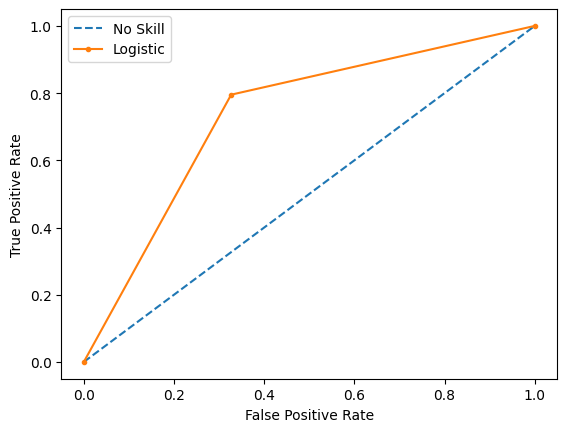

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# Calculate scores
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# Calculate ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Plot the ROC curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

###truth table

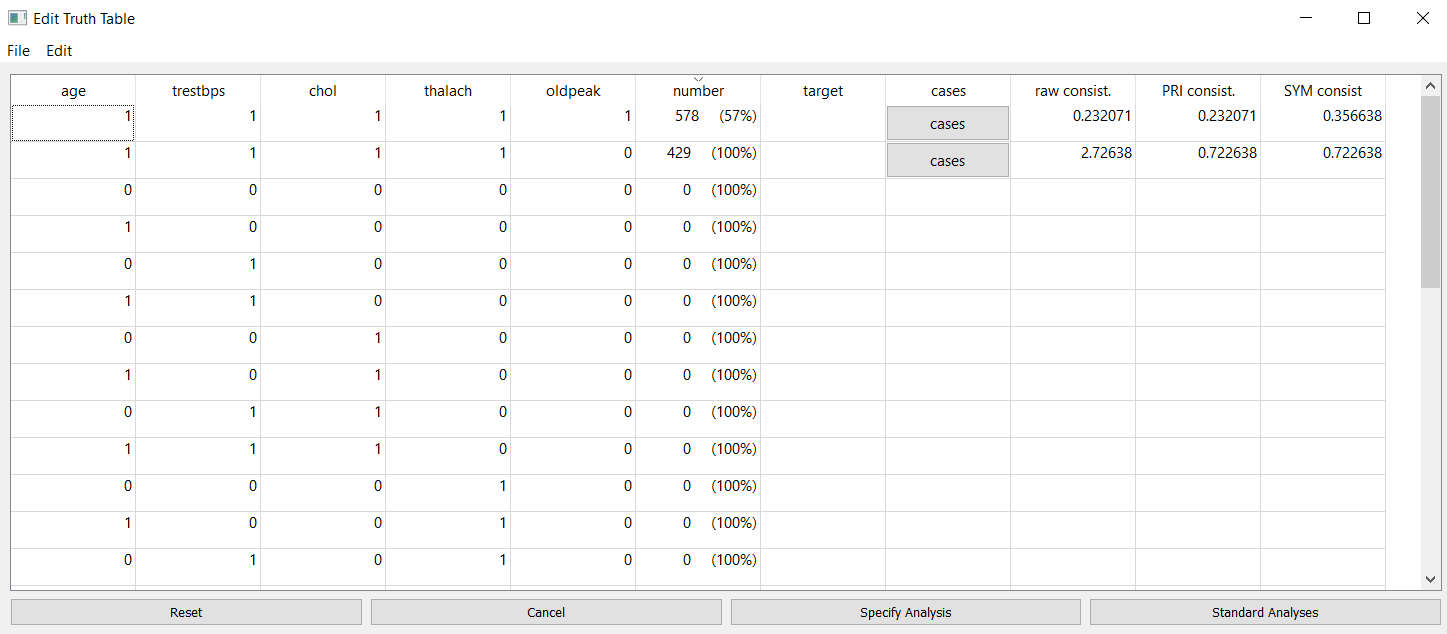

###Calibrating

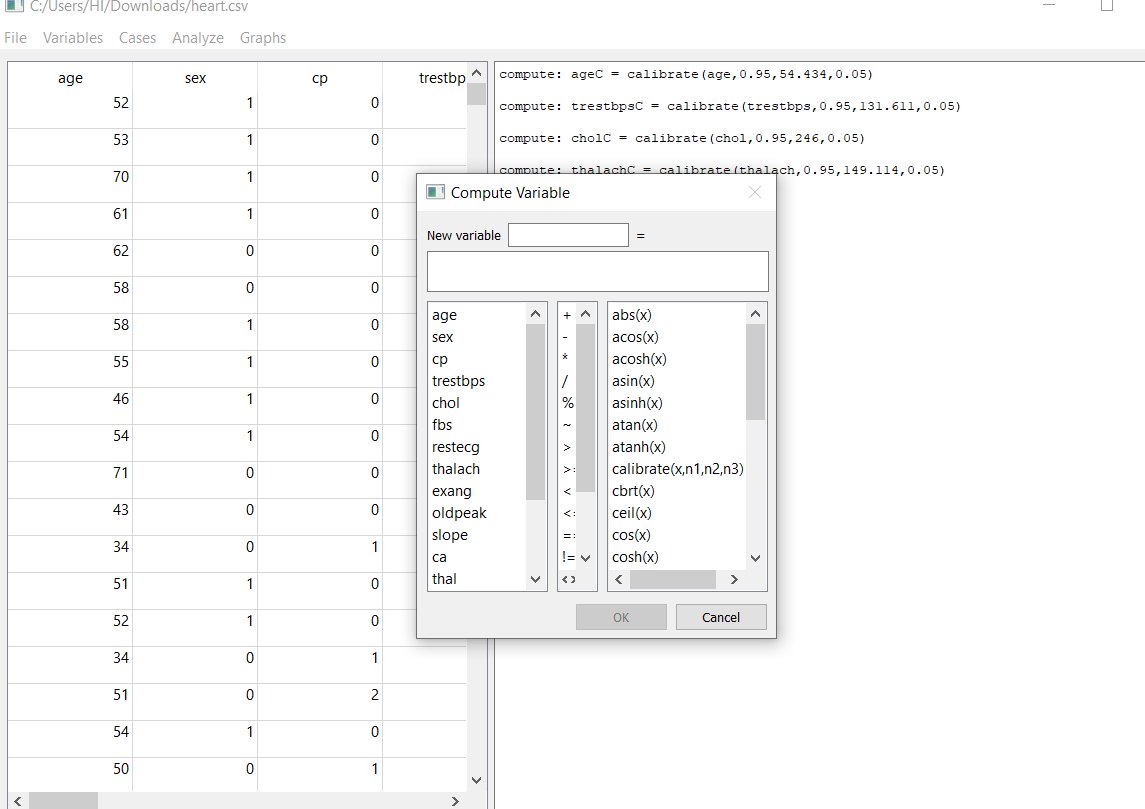

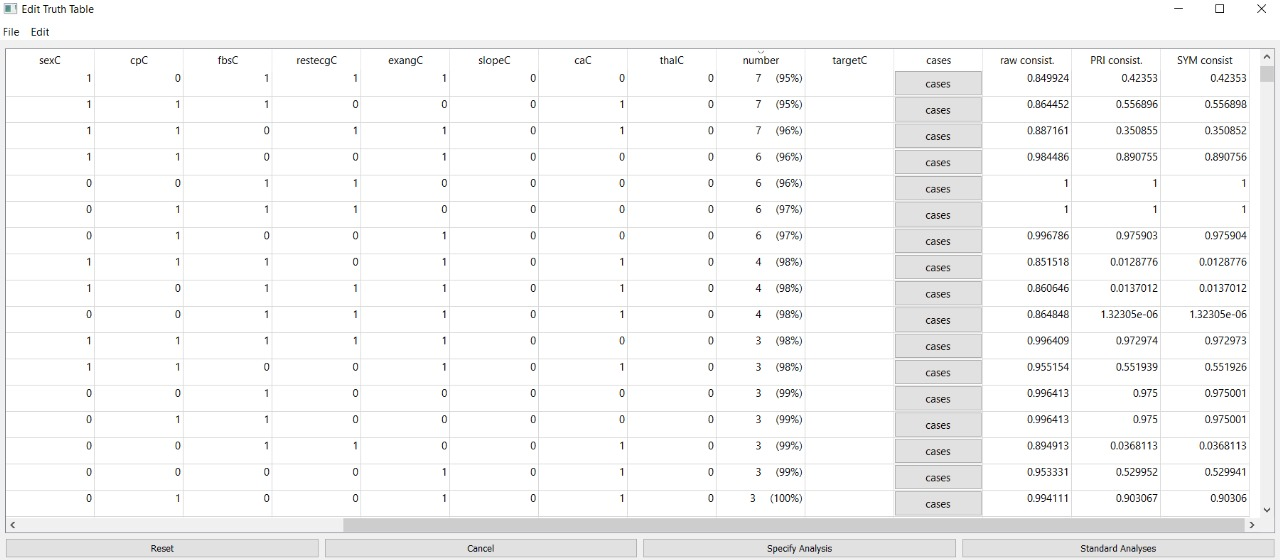

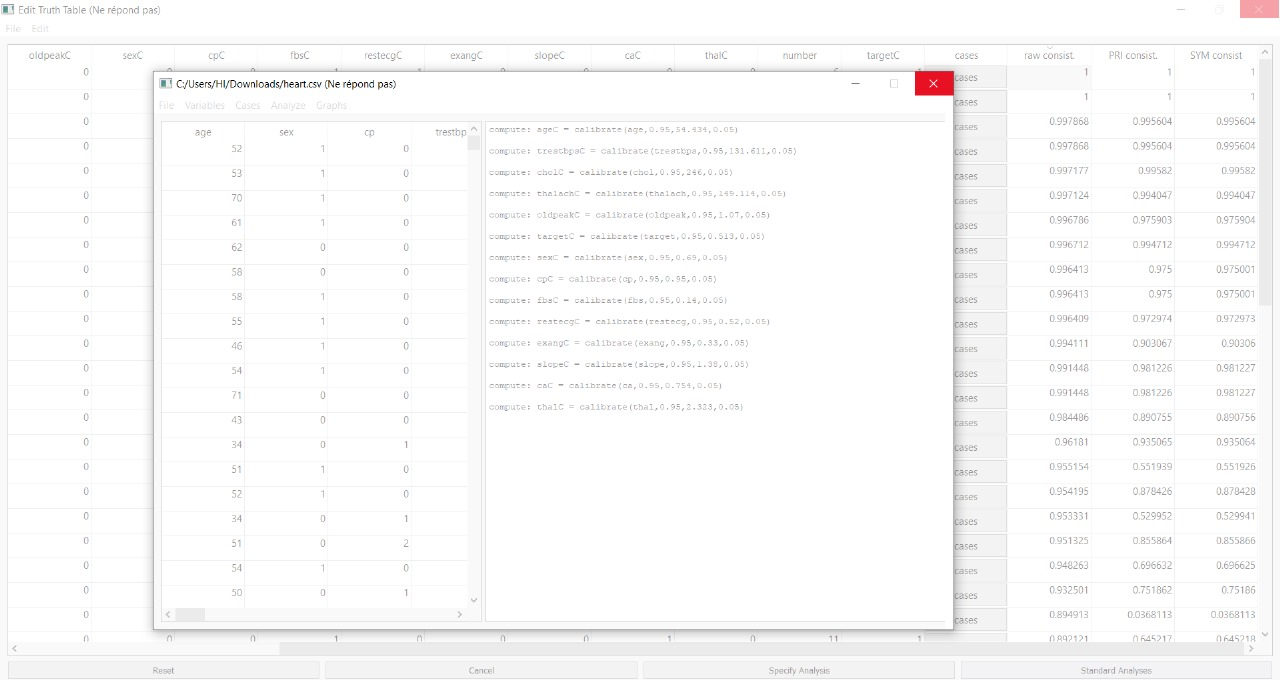